We will be using the Heart Disease dataset from the UCI Machine Learning Repository for this project.


Specifically, we will be using one of the processed datasets from Cleveland, which has 14 attributes (most important ones used in other scientific works) from the total 76 features.

The dataset comprises 303 observations, 13 features, and 1 target attribute. The 13 features include the results of non-invasive diagnostic tests along with other relevant patient information. The target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD.

Full details of attributes can be found here:

Link: https://archive.ics.uci.edu/ml/datasets/heart+disease



## 1. Classification using Tree-Based Classifiers  [5 points]

We are going to use the above dataset to train and test tree-based classifiers for predicting the outcome column `num`,  which represents the presence or absence of coronary artery disease. Note: Since this is a supervised task, we will  use the target column in this question.

You may refer to the lecture 4 notebook, `sklearn_Decision_Tree_Demo_solved.ipynb` for hints.

**Steps:**
1. Read the dataset using Pandas. The outcome column in this dataset is `num`, which has values 0, 1, 2, 3. We will transform this to a binary classification task. The column `num` represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD. Create an outcome column (say "chd"), with a value of  1, indicating the presence of CHD and a value of 0, indicating the absence of CHD. Remove the column `num` as it is no longer needed.

2. Divide the dataset into feature matrix (X) and outcome arrays (y). Here the outcome  (y) is the newly created binary column that you create in 1.

3. Perform any required data preprocessing of the features (X). This might include missing value imputation, normalization, and handling categorical columns.

4. Split the dataset into training and test sets. Use a split of your choice (e.g. 80/20 or 70/30).

5. Fit a Decision Tree Classifier (DTC) on the training set and report the classification metrics (using classification report) on the test set. Rank the features in the dataset based on features importance returned the trained DTC model.

6. Repeat Step (5) using the Random Forest Classifier (RFC). Is there any difference in the feature importance ranking compared with DTC? If yes, which one (RFC or DTC) returns a better ranking according to you.


## 1. Reading the dataset

In [1]:
from google.colab import files

uploaded = files.upload()

Saving chd_processed_cleveland.csv to chd_processed_cleveland.csv


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


df = pd.read_csv('chd_processed_cleveland.csv')

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Transforming target variable to binary classification
 0 represents absence of CHD, 1-4 represents presence of CHD

In [73]:
df['chd'] = np.where(df['num'] > 0, 1, 0)
df = df.drop('num', axis=1)

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [75]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,chd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## 2. Dividing into features and target

In [76]:
X = df.drop('chd', axis=1)
y = df['chd']

In [77]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [78]:
y.head()

,chd
0,0
1,1
2,1
3,0
4,0


## 3. Data Preprocessing

Check for missing values.
First using isnull()

In [79]:
missing_values = X.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


Then using isna()

In [80]:
missing_values = X.isna().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


### Handling Categorical Variables

In [81]:
print(df['ca'].value_counts())
print(df['thal'].value_counts())

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64
thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64


The 'ca' and 'thal' columns are catagorical columns containing strings and may contain missing values. To handle this I will be one hot encoding these two columns with the pd.get_dummies method

With this method, values like '0', '1', '2', '3', after one-hot encoding with drop_first=True, would return columns like

ca_1 (1 if ca=1, 0 otherwise)
ca_2 (1 if ca=2, 0 otherwise)
ca_3 (1 if ca=3, 0 otherwise)

The first category ('?') is dropped and its presence is implied when all the other columns are 0. Same goes for the other column 'thal'.

In [82]:
X = pd.get_dummies(X, columns=['ca', 'thal'], drop_first=True)

In [83]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,False,False,False,False,True,False,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,False,False,True,False,False,False,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,False,True,False,False,False,True,False
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,False,False,False,False,False,False,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,False,False,False,False,False,False,False


Imputing missing values with the mean for numerical features


In [84]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X.describe()

# There don't seem to be any nulls so the means of columns are pretty much the same as before.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.214521,0.125413,0.066007,0.013201,0.059406,0.386139,0.006601
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.411169,0.331734,0.248704,0.114325,0.236774,0.487668,0.081110
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**I believe for this use case we don't need to be scaling features, as they aren't in vastly different scales and also as we're using decision tree-based models, these are not affected by feature scaling since they already split data based on feature thresholds.**


## 4. Train-Test Splits

(80/20 split)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
196,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
y_train.value_counts()

,count
chd,
0,135
1,107


## 5. Fitting a Decision Tree Classifier

In [89]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Predicting and Evaluating results

In [90]:
y_pred_dtc = dtc.predict(X_test)
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dtc))


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Here we have an accuracy of 85% and decent overall results with this decision tree classifier.
### Next I will get the feature importance scores from the decision tree.

In [91]:
dtc_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtc.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nDecision Tree Feature Importance:")
print(dtc_importance.head(10))

# Most important feature seems like CP.


Decision Tree Feature Importance:
     Feature  Importance
2         cp    0.239649
9    oldpeak    0.152421
0        age    0.118364
4       chol    0.100772
16  thal_7.0    0.078587
3   trestbps    0.076615
7    thalach    0.070532
1        sex    0.042695
12    ca_2.0    0.036923
11    ca_1.0    0.036615


### Visualizing the tree

True

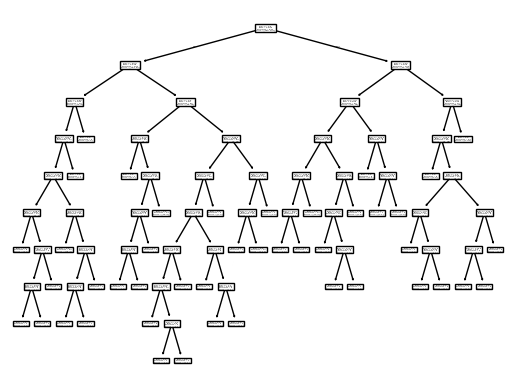

In [92]:
from sklearn.tree import plot_tree
plot_tree(dtc)

# visualize the decision tree
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(                           # Create dot data
    dtc, filled=True, rounded=True,
    feature_names=X_train.columns,
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('dtc_chd.png')

## 6. Fitting a Random Forest Classifier to Compare.

In [93]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predicting and Evaluating results

In [94]:
y_pred_rfc = rfc.predict(X_test)
print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rfc))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



With this model I am able to improve my accuracy to 89% and the overall performance of the model has also improved for both classes in terms of precision, recall and f1 scores.

### Feature importance scores from the random forest classifier

In [95]:
rfc_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfc.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rfc_importance.head(10))

# Similar to decision trees, random forest also considers cp as the most important feature.


Random Forest Feature Importance:
     Feature  Importance
2         cp    0.139718
9    oldpeak    0.119116
7    thalach    0.113507
0        age    0.107736
16  thal_7.0    0.085471
4       chol    0.081661
3   trestbps    0.079361
10     slope    0.061568
8      exang    0.055042
1        sex    0.040060


### Visualizing the Random Forest

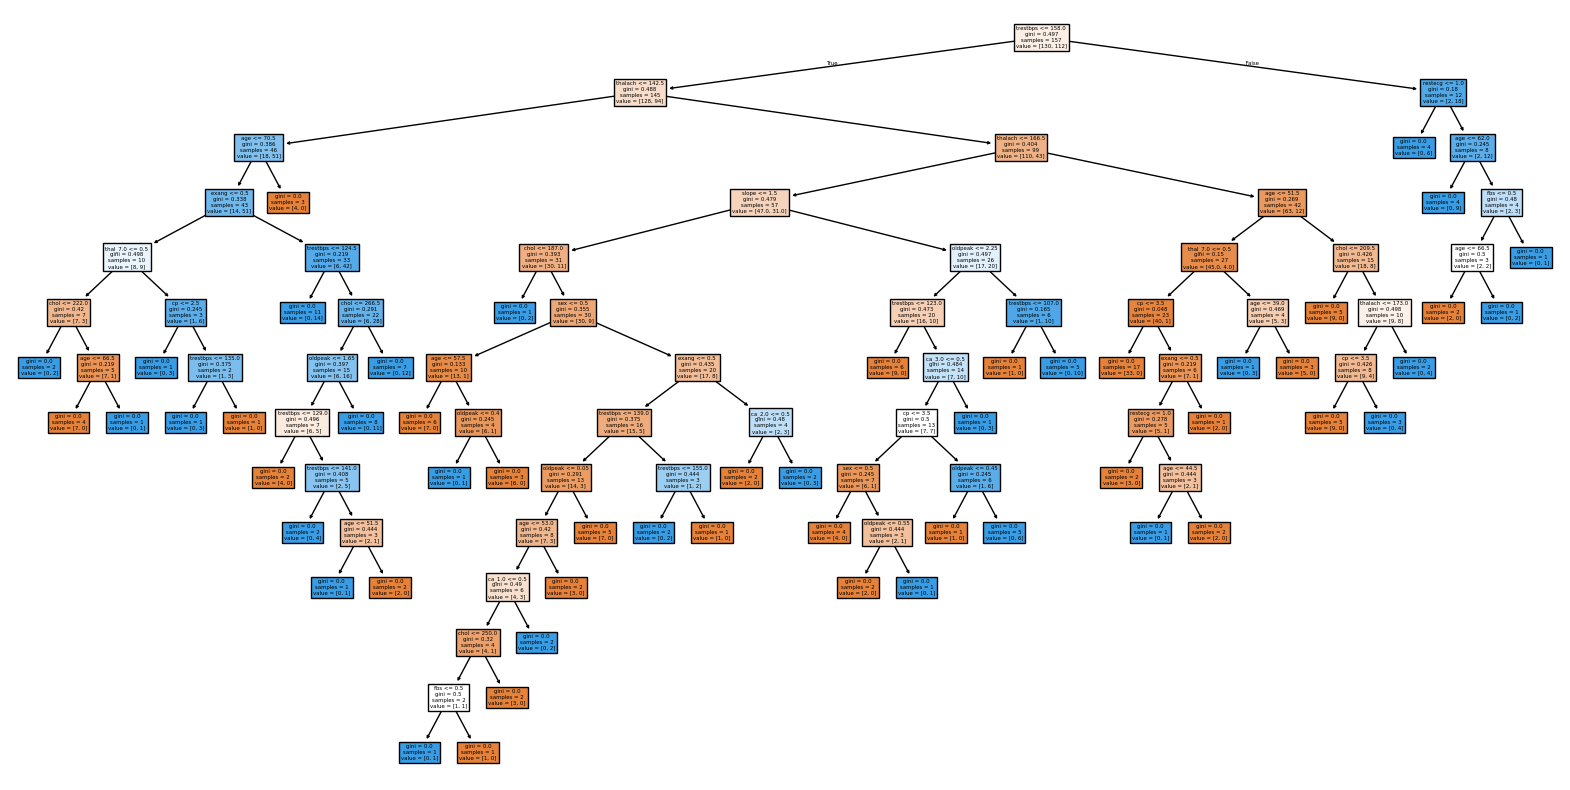

In [96]:
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt
from pydotplus.graphviz import graph_from_dot_data

single_tree = rfc.estimators_[0]  # First tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X_train.columns)
plt.show()

## 7. Comparing the top 5 features from both models.

In [97]:
print("\nComparison of Top 5 Features:")
print("Decision Tree:", dtc_importance['Feature'].head(5).tolist())
print("Random Forest:", rfc_importance['Feature'].head(5).tolist())


Comparison of Top 5 Features:
Decision Tree: ['cp', 'oldpeak', 'age', 'chol', 'thal_7.0']
Random Forest: ['cp', 'oldpeak', 'thalach', 'age', 'thal_7.0']


**Key Findings**
- The first two top features from both models are the same (cp and oldpeak)
- Similarly, both models consider age and thal_7.0 to be important features.
- However, the random forest considers thalach to be more important than age and thal7.0
- and the decision tree considers the feature age and chol to be more important than thal7.0

## 8. Optimizing Results 

### Checking for Multicolinearity:

Some features may be highly correlated, which can introduce redundancy. I will use Variance Inflation Factor (VIF) to detect multicollinearity.

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train.copy()  # Exclude target variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


     Feature        VIF
0        age  43.519365
1        sex   3.628478
2         cp  12.374207
3   trestbps  65.160771
4       chol  29.145459
5        fbs   1.315614
6    restecg   2.206985
7    thalach  37.589384
8      exang   2.123998
9    oldpeak   3.131212
10     slope  11.435227
11    ca_1.0   1.587285
12    ca_2.0   1.557486
13    ca_3.0   1.246775
14      ca_?   1.059993
15  thal_6.0   1.383414
16  thal_7.0   2.397590
17    thal_?   1.048840


VIF > 10 indicates high multicollinearity, especially:


* Trestbps (65.16)
* Age (43.52)
* Chol (29.15)
* Thalach (37.59)
* CP (12.37)
* Slope (11.43)

These features may contain redundant information. Dropping these correlated features can improve model performance and interpretability.


Next, I will identify highly correlated pairs:

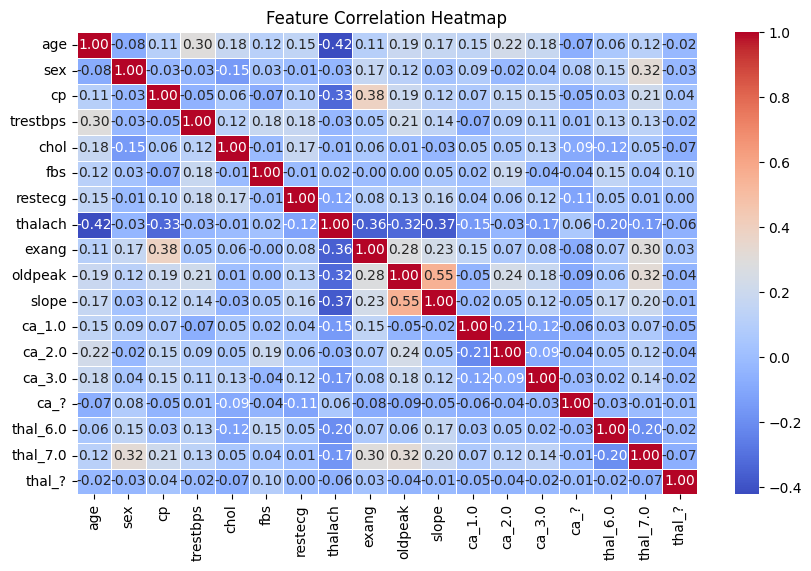

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


It is a bit difficult here to identify which pairs are highly correlated and which features should be kept and which should be dropped. I can instead try PCA:

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # PCA requires scaling

pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X_train.shape[1]}, Reduced features: {X_pca.shape[1]}")


Original features: 18, Reduced features: 16


Let's now retrain the Random Forest on this X_pca dataframe to see the outcome.

In [101]:
rfc_pca = RandomForestClassifier(random_state=42)
rfc_pca.fit(X_pca, y_train)

RandomForestClassifier(random_state=42)

Now to test this model, I would need to apply pca to the test set too and evaluate the model.

In [103]:
# Standardize X_test using the same scaler
X_test_scaled = scaler.transform(X_test)  # Use transform(), NOT fit_transform()

# Apply the same PCA transformation
X_test_pca = pca.transform(X_test_scaled)

# Now, make predictions with the transformed test data
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)

# Evaluate the model
print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rfc_pca))



Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



This actually didn't improve the overall accurary of the random forest from 89%, and stayed at 87% instead. So in my opinion the best way to optimize this model would be to use **Hyperparameter Tuning** through **Grid Search**. 